# Polynomial Regression

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('Assignment-1_Diamond_price.csv')
data.head(10)

x = data[['carat']]
y = data['price']


In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_preds= lin_reg.predict(x)


In [25]:
from sklearn.preprocessing import  PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x)
#poly_reg.fit(x_poly,y)
print(x_poly)

[[1.00000000e+00 2.30000000e-01 5.29000000e-02 1.21670000e-02
  2.79841000e-03 6.43634300e-04]
 [1.00000000e+00 2.10000000e-01 4.41000000e-02 9.26100000e-03
  1.94481000e-03 4.08410100e-04]
 [1.00000000e+00 2.30000000e-01 5.29000000e-02 1.21670000e-02
  2.79841000e-03 6.43634300e-04]
 ...
 [1.00000000e+00 7.00000000e-01 4.90000000e-01 3.43000000e-01
  2.40100000e-01 1.68070000e-01]
 [1.00000000e+00 8.60000000e-01 7.39600000e-01 6.36056000e-01
  5.47008160e-01 4.70427018e-01]
 [1.00000000e+00 7.50000000e-01 5.62500000e-01 4.21875000e-01
  3.16406250e-01 2.37304688e-01]]


In [26]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts=train_test_split(x_poly,y, test_size=0.25, random_state=0)

In [27]:
lin_reg_2 = LinearRegression()
#model=lin_reg_2.fit(xtr, ytr)
lin_reg_2.fit(xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#poly_preds=model.predict(xts)
y_pred_poly = lin_reg_2.predict(xts)

In [29]:
print(model.intercept_)
print(model.coef_)
#from sklearn.metrics import r2_score
#r2_score(yts,poly_preds)*100

1012.6232011320994
[    0.         -4070.55631    10877.74512079 -2549.12323664
  -280.3126183     84.67917628]


In [30]:
from sklearn.metrics import r2_score
r2_score(y_pred_poly,yts)*100

85.09930152739375

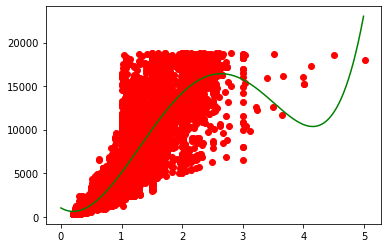

In [32]:
plt.scatter(x, y, color = 'red')
x_grid=np.arange(0,5, 0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color='green')

plt.show()